# Hospital Readmissions Data Analysis and Recommendations for Reduction

## Daniel Lee

### July 13, 2018

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [216]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import statistics
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import t
from scipy.stats import norm
from scipy.stats import f
from scipy.stats import ttest_ind
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [217]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data_hospital_readmissions/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [218]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/root/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [219]:
clean_hospital_read_df[81:-3].head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013


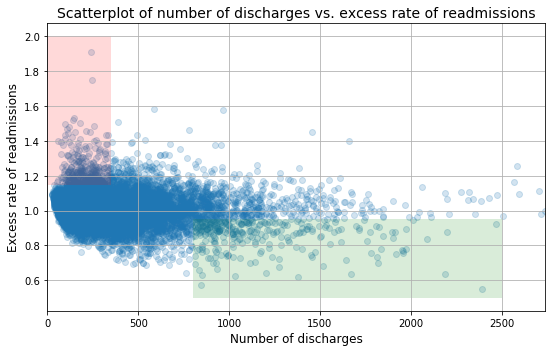

In [220]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission ratio is 1.023 and 63% have excess readmission ratio greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission ratio is 0.978 and 44% have excess readmission ratio greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A. Do you agree with the above analysis and recommendations? Why or why not?


Overall, I partially agree with the above analysis and I disagree with the recommendations for the following reasons:

1. I agree with the statistics such as the correlation, percentages of excess readmission ratio greater than one, and mean excess readmission ratio, because the numbers presented are accurate. 
* I will confirm to see if the stated negative correlation between number of discharges and excess readmission ratio is due to chance or if these statistics are statistically significant by conducting hypothesis test.
* I will see if the stated difference in mean excess readmission ratio between the hospitals with less than 100 discharges and the hospitals with greater than 1000 discharges is due to chance variation or if the difference is statistically significant.
* I disagree with how the analysis presents the percentage of hospitals with excess readmission ratio greater than one for the two different groups. Presenting data in this way can make the difference between the two groups larger than they really are.
* I will see if the stated difference in proportions of hospitals with excess readmission ratio greater than one between the hospitals with less than 100 discharges and the hospitals with greater than 1000 discharges is due to chance variation or if the difference is statistically significant.
* I disagree with the suggested recommendations based on the portrayed scatter plot above. The scatter plot shows that there is not a strong relationship between number of discharges and excess rate of admissions. It's hard to make any kind of recommendations after observing the weak correlation presented in this scatter plot.

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis.



**Overall, rate of readmissions is trending down with increasing number of discharges**
* I will test this statement by calculating a correlation coefficient.

In [221]:
# define a function to calculate Pearson correlation coefficient
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [222]:
# Compute observed correlation: r_obs
r_obs = pearson_r(x, y)
round(r_obs, 3)

-0.093

The correlation between `Number of Discharges` and `Excess Readmission Ratio` is -0.093. Although it is technically true that the rate of readmissions is trending down with increasing number of discharges, it is a very weak trend. Further, let's do a hypothesis test of correlation using simulation to see if this correlation could have been due to random chance.

****
## Hypothesis Test of Correlation

Procedure:

1. Null hypothesis: `Number of Discharges` and `Excess Readmission Ratio` are completely uncorrelated. That is, $\rho = 0$.
* Alternative hypothesis: `Number of Discharges` and `Excess Readmission Ratio` are negatively correlated. That is, $\rho < 0$.
* Simulate the data assuming null hypothesis is true by permuting the `Number of Discharges` column 10000 times and calculating the correlation with `Excess Readmission Ratio` column. This will create 10000 permuted replicates of sample Pearson correlation $r$.
* Use sample Pearson correlation, $r$, as a test statistic.
* Compute p-value as fraction of permuted replicates that have $r$ less than or equal to observed $r$.

In [223]:
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute x measurments: x_permuted
    x_permuted = np.random.permutation(x)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(x_permuted, y)

# Compute p-value: p
p = np.sum(perm_replicates <= r_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


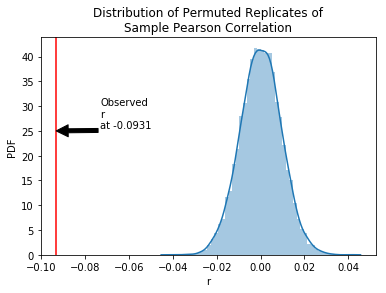

In [224]:
# Generate a visual result of this correlation test
_ = sns.distplot(perm_replicates, norm_hist = True)
_ = plt.axvline(x=r_obs, color = 'red')
_ = plt.title('Distribution of Permuted Replicates of\nSample Pearson Correlation')
_ = plt.xlabel('r')
_ = plt.ylabel('PDF')
_ = plt.annotate('Observed\nr\nat {}'.format(round(r_obs, 4)), 
                 xy = (r_obs, 25), 
                 xytext = (r_obs + 0.02, 25.5), 
                 arrowprops = dict(facecolor = 'black'))
plt.show()

The p-value is essentially zero. I reject the null hypothesis that population Pearson correlation coefficient between `Number of Discharges` and `Excess Readmission Ratio` is zero. The negative correlation between `Number of Discharges` and `Excess Readmission Ratio` seem to be real.

In this case, although the negative correlation between `Number of Discharges` and `Excess Readmission Ratio` is statistically significant, it does not mean that there is much practical significance. The reason for this is because the correlation is so low. `Number of Discharges` and `Excess Readmission Ratio` have a very weak linear relationship. It is dangerous to make policy change recommendations based on this statistic. Further, the weak correlation can be caused by a handful of outliers that skew the relationship between these two variables.

****


**In hospitals/facilities with number of discharges < 100, mean excess readmission ratio is 1.023 and 63% have excess readmission ratio greater than 1. In hospitals/facilities with number of discharges > 1000, mean excess readmission ratio is 0.978 and 44% have excess readmission ratio greater than 1**

* Check the validity of these statements by performing the following:
    * Bootstrap two sample test for population means 
        * Test if the population mean excess readmission ratio for hospitals with number of discharges > 1000 is less than the population mean of excess readmission ratio for hospitals with number of discharges < 100.
    * Two sample t test for population means 
        * Test if the population mean excess readmission ratio for hospitals with number of discharges > 1000 is less than the population mean of excess readmission ratio for hospitals with number of discharges < 100.
    * Bootstrap two sample test for population proportions
        * Test if the population proportion for excess readmission ratio greater than 1 amoung hospitals with number of discharges > 1000 is less than the population proportion for excess readmission ratio greater than 1 among hospitals with number of discharges < 100
    * Two sample t test for population proportions
        * Test if the population proportion for excess readmission ratio greater than 1 amoung hospitals with number of discharges > 1000 is less than the population proportion for excess readmission ratio greater than 1 among hospitals with number of discharges < 100

## Bootstrap Two Sample Test for Population Means

First, let's compare the two distributions visually by comparing the ECDFs and histograms.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


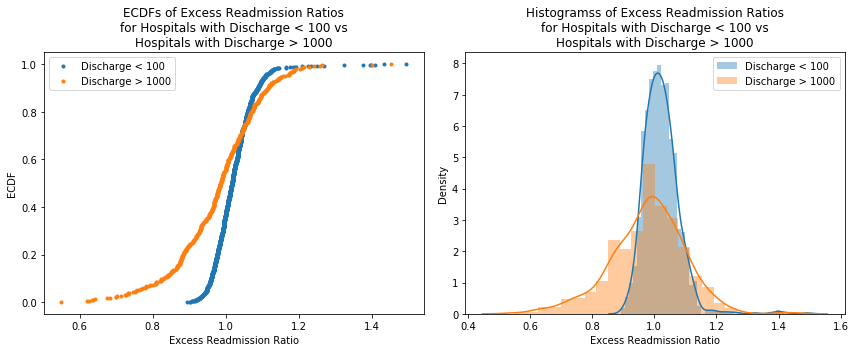

In [225]:
# ecdf function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

# dataframe with no null values
hospital_no_null = clean_hospital_read_df[81:-3]

# excess readmission ratio for hospitals with less than 100 discharges
excessReadmit_100 = hospital_no_null.loc[hospital_no_null['Number of Discharges'] < 100, 'Excess Readmission Ratio']

# excess readmission ratio for hospitals with greater than 1000 discharges
excessReadmit_1000 = hospital_no_null.loc[hospital_no_null['Number of Discharges'] > 1000, 'Excess Readmission Ratio']
# calculate points for ecdf for excessReadmit_100 and excessReadmit_1000
x_excessReadmit_100, y_excessReadmit_100 = ecdf(excessReadmit_100)
x_excessReadmit_1000, y_excessReadmit_1000 = ecdf(excessReadmit_1000)

# plot ecdfs of excessReadmit_100 and excessReadmit_1000 excess readmission ratios
fig, (ax_ecdf, ax_hist) = plt.subplots(1, 2, figsize=(12,5))
# ecdf subplot
_ = ax_ecdf.plot(x_excessReadmit_100, y_excessReadmit_100, marker = '.', linestyle = 'none')
_ = ax_ecdf.plot(x_excessReadmit_1000, y_excessReadmit_1000, marker = '.', linestyle = 'none')
_ = ax_ecdf.legend(('Discharge < 100', 'Discharge > 1000'))
_ = ax_ecdf.set_title("""ECDFs of Excess Readmission Ratios
for Hospitals with Discharge < 100 vs\nHospitals with Discharge > 1000""")
_ = ax_ecdf.set_xlabel('Excess Readmission Ratio')
_ = ax_ecdf.set_ylabel('ECDF')

# histogram subplot
_ = sns.distplot(excessReadmit_100, norm_hist = True)
_ = sns.distplot(excessReadmit_1000, norm_hist = True)
_ = ax_hist.set_title("""Histogramss of Excess Readmission Ratios
for Hospitals with Discharge < 100 vs\nHospitals with Discharge > 1000""")
_ = ax_hist.set_ylabel('Density')
_ = ax_hist.legend(('Discharge < 100', 'Discharge > 1000'))
fig.tight_layout()
plt.show()

From the comparison of the ECDFs and histograms, it seems that the distribution of excessReadmit_100 excess readmission ratios and excessReadmit_1000 excess readmission ratios are different. The excessReadmit_100 excess readmission ratios have smaller spread than the excessReadmit_1000 readmission rates.

* **Null Hypothesis**: The average excess readmission ratio between the two distributions are the same. That is

$$\mu_{excessReadmit_{100}} = \mu_{excessReadmit_{1000}}$$

* **Alternative Hypothesis**: The average excess readmission ratio for hospitals with discharges < 100 is higher than the average excess readmission ratio for hospitals with discharges > 1000

$$\mu_{excessReadmit_{100}} > \mu_{excessReadmit_{1000}}$$

Procedure:

1. Combine the two samples and calculate the mean.
2. Recenter the sample means for the two samples.
3. Draw $B$ samples with replacement from the two different recentered samples and calculate the mean. Here, I use $B = 10000$.
4. Calculate the differences of these $B$ sample means between $excessReadmit_{100}$ and $excessReadmit_{1000}$. This will be the bootstrap sampling distribution of the sample difference in means
5. Calculate the p-value as getting the difference in means greater than the one I observed in the sample.
6. Compare p-value to significance level $\alpha$. In this case, I'll use $\alpha = 0.01$.

In [226]:
# bootstrap test of means

# define functions to use for bootstrapping
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1d data"""
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])

# compute observed means:
empirical_diff_means = np.mean(excessReadmit_100) - np.mean(excessReadmit_1000)

# Generate shifted arrays
excessReadmit_1000_shifted = excessReadmit_1000 - np.mean(excessReadmit_1000) + empirical_diff_means
excessReadmit_100_shifted = excessReadmit_100 - np.mean(excessReadmit_100) + empirical_diff_means

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_1000 = draw_bs_reps(excessReadmit_1000_shifted, np.mean, 10000)
bs_replicates_100 = draw_bs_reps(excessReadmit_100_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_100 - bs_replicates_1000

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / 10000 * 2
print('p-value =', p)

p-value = 0.0


/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


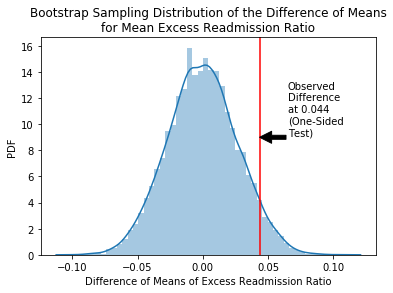

In [238]:
# create plot of bootstrap sampling distribution of difference of means and observed difference
_ = sns.distplot(bs_replicates)
_ = plt.title('Bootstrap Sampling Distribution of the Difference of Means\nfor Mean Excess Readmission Ratio')
_ = plt.xlabel('Difference of Means of Excess Readmission Ratio')
_ = plt.ylabel('PDF')
_ = plt.axvline(x=empirical_diff_means, color = 'red')
_ = plt.annotate('Observed\nDifference\nat {}\n(One-Sided\nTest)'.format(round(empirical_diff_means, 3)), 
                  xy = (empirical_diff_means, 9), 
                  xytext = (empirical_diff_means * 1.5, 9.15), 
                  arrowprops = dict(facecolor = 'black'))
plt.show()

Since p-value is 0.0, at 0.01 significance level, I will reject the null hypothesis that the means of the two distributions are the same. This is supported by the plot above. There is strong evidence that the population mean excess readmission ratio for hospitals with discharges < 100 is higher than that of hospitals with discharges > 1000.

## Two-Sample t-Test for Population Means

* **Null Hypothesis**: The average excess readmission ratio between the two distributions are the same. That is

$$\mu_{excessReadmit_{100}} = \mu_{excessReadmit_{1000}}$$

* **Alternative Hypothesis**: The average excess readmission ratio for hospitals with discharges < 100 is higher than the average excess readmission ratio for hospitals with discharges > 1000

$$\mu_{excessReadmit_{100}} > \mu_{excessReadmit_{1000}}$$

Check Assumptions:

To perform a two-sample t-test, I will first check the following assumptions.

1. Are the distributions independent from each other?
    * Yes. I can assume that the distributions are independent from each other because the original sample was sampled randomly.
2. Are the samples taken independently?
    * Yes. Same reason as assumption 1.
3. Can we assume normal distributions for the sampling distribution of the sample mean for the two samples?
    * Yes. The sample size for both the hospitals with less than 100 discharges and the hospitals with greater than 1000 discharges are greater than 30. Hence, by the CLT, the sampling distribution of the sample mean would be a normal distribution.
4. Do the populations have equal variance?
    * To test this, I will perform an F test for testing equal variance.

Procedure:

1. Assume $\mu_{excessReadmit_{100_{H_0}}} = \mu_{excessReadmit_{1000_{H_0}}}$. So, under the null hypothesis, difference in means is zero.
2. Test to see if it's valid to assume whether $\sigma^2_{excessReadmit_{100}} = \sigma^2_{excessReadmit_{1000}}$.
    * If the two population standard deviations seem to be equal, then perform the pooled t test. That is, use the following estimate for the standard error:  
    
$$standard\:error = s_p\sqrt{1/n_{excessReadmit_{100}} + 1/n_{excessReadmit_{1000}}}$$  

where $$s_p^2 = \frac{(n_{excessReadmit_{100}} - 1)s_{excessReadmit_{100}}^2 + (n_{excessReadmit_{1000}} - 1)s_{excessReadmit_{1000}}^2}{n_{excessReadmit_{100}} + n_{excessReadmit_{1000}} - 2}$$

where  
+ $n_{excessReadmit_{100}}$ is the sample size of $excessReadmit_{100}$ excess readmission ratios
+ $n_{excessReadmit_{1000}}$ is the sample size of $excessReadmit_{1000}$ excess readmission ratios
+ $s_{excessReadmit_{100}}^2$ is the sample variance of $excessReadmit_{100}$ excess readmission ratios
+ $s_{excessReadmit_{1000}}^2$ is the sample variance of $excessReadmit_{1000}$ excess readmission ratios

and $df = n_{excessReadmit_{100}} + n_{excessReadmit_{1000}} - 2$


- If the two population standard deviations seems to be different, then use the unpooled t test using the following estimate for standard error:
    
$$standard\:error = \sqrt{\frac{s_{excessReadmit_{100}}^2}{n_{excessReadmit_{100}}} + \frac{s_{excessReadmit_{1000}}^2}{n_{excessReadmit_{1000}}}}$$

and $df$ is complicated (usually calculated by software).  

3. Calculate the test statistic:
$$ t = \frac{\overline{x}_{excessReadmit_{100}} - \overline{x}_{excessReadmit_{1000}} - 0}{s.e.}$$  

4. Calculate the p-value as getting the difference in means or more extreme values than the one I observed in the sample. This is a two-sided test.
5. Compare p-value to signifance level $\alpha$. In this case, I'll use $\alpha = 0.01$.

**Test of Equal Variance: F Test**

In [228]:
# equal variance f-test
F = np.var(excessReadmit_1000) / np.var(excessReadmit_100) # f-statistic
df1 = len(excessReadmit_1000) - 1 # degrees of freedom 1
df2 = len(excessReadmit_100) - 1 # degrees of freedom 2
p_value = f.cdf(F, df1, df2) # p-value
p_value

0.9999999999999999

Since the p-value is quite high, I can safely assume that the population variances are equal. So, I will use the pooled variance.

**Two Sample t-Test**

In [229]:
# two-sample t-test
results = (ttest_ind(excessReadmit_1000, excessReadmit_100, equal_var = True))
results

Ttest_indResult(statistic=-9.914442964326538, pvalue=1.5212365437597773e-22)

The p-value reported above is for two-tailed test. To get the one-tailed test, divide the p-value of 1.52e-22 by 2. Hence, the p-value is 7.606e-23.

Based on the p-value, at the 0.01 significance level, I will reject the null hypothesis that the two populations have equal excess readmission ratio means.

Let's examine the result of the two-sample t-test graphically.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


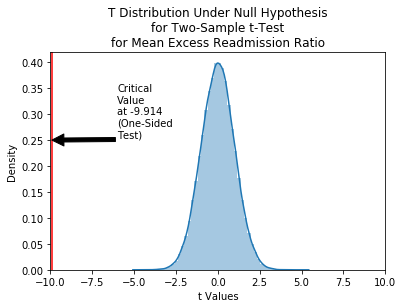

In [230]:
# sample 100000 times from a standard t distribution with df = 1646
t_distribution = np.random.standard_t(df = df1 + df2, size = 100000)

test_statistic = results[0]

# generate plot
_ = sns.distplot(t_distribution, norm_hist = True)
_ = plt.axvline(x=test_statistic, color = 'red')
_ = plt.title('T Distribution Under Null Hypothesis\nfor Two-Sample t-Test\nfor Mean Excess Readmission Ratio')
_ = plt.xlabel('t Values')
_ = plt.xlim(-10, 10)
_ = plt.ylabel('Density')
_ = plt.annotate('Critical\nValue\nat {}\n(One-Sided\nTest)'.format(round(test_statistic, 3)), 
                 xy = (test_statistic, 0.25), 
                 xytext = (-6, .255), 
                 arrowprops = dict(facecolor = 'black'))
plt.show()

The visualization above shows why the p-value is so small.

## Conclusion

Based on the bootstrap two-sample test for means and the two-sample t-test for means indicate that there's a significant difference in mean excess readmission ratio between hospitals with less than 100 discharges and hospitals with more than 1000 discharges, it does not necessarily indicate practical significance because the observed difference is so small. 

****
****

## Bootstrap Two-Sample Test for Population Proportions

* **Null Hypothesis**: The population proportion of excess readmission ratio greater than 1 in hospitals with discharges less than 100 is the same as the population proportion of excess readmission ratio greater than 1 in hospitals with discharges greater than 1000. That is

$$p_{excessReadmit_{100}} = p_{excessReadmit_{1000}}$$

* **Alternative Hypothesis**: The population proportion of excess readmission ratio greater than 1 in hospitals with discharges less than 100 is greater than the population proportion of excess readmission ratio greater than 1 in hospitals with discharges greater than 1000. That is

$$p_{excessReadmit_{100}} > p_{excessReadmit_{1000}}$$

Procedure:

1. Combine the two samples and calculate the overall proportion of excess readmission ratio greater than 1.
2. Recenter the sample proportions for the two samples.
3. Draw $B$ samples with replacement from the two different recentered samples and calculate the proportion. Here, I use $B = 10000$.
4. Calculate the differences of these $B$ sample proportions between $excessReadmit_{100}$ and $excessReadmit_{1000}$. This will be the bootstrap sampling distribution of the sample difference in proportions.
5. Calculate the p-value as getting the difference in proportions or greater values than the one I observed in the sample. This is a one-sided test.
6. Compare p-value to significance level $\alpha$. In this case, I'll use $\alpha = 0.01$.

In [231]:
# create 0/1 column for excess readmission ratio > 1 for hospitals with discharges < 100 and hospitals with discharges > 1000
excessReadmit_100_excess = (excessReadmit_100 > 1).map(lambda x: 1 if x == True else 0)
excessReadmit_1000_excess = (excessReadmit_1000 > 1).map(lambda x: 1 if x == True else 0)

# calculate sample proportions for two populations
p_100 = excessReadmit_100_excess.mean()
p_1000 = excessReadmit_1000_excess.mean()

# calculate overall sample proportion for two populations combined
p_overall = np.mean(hospital_no_null.loc[:, 'Excess Readmission Ratio'] > 1)

# calculate observed difference in proportions
empirical_diff_proportions = p_100 - p_1000

# recenter the datapoints to have the same mean
p_100_shifted = excessReadmit_100_excess - p_100 + p_overall
p_1000_shifted = excessReadmit_1000_excess - p_1000 + p_overall

# compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_p_100 = draw_bs_reps(p_100_shifted, np.mean, 10000)
bs_replicates_p_1000 = draw_bs_reps(p_1000_shifted, np.mean, 10000)

# get replicates of difference of proportions: bs_replicates
bs_replicates = bs_replicates_p_100 - bs_replicates_p_1000

# gompute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_proportions) / 10000
print('p-value =', p)

p-value = 0.0


Notice that the p-value is very small. At 0.01 significance level, I will reject the null hypothesis that the two proportions are the same. It seems as though hospitals with discharges less than 100 do have a higher proportion of excess readmissions ratio greater than 1 than do the hospitals with discharges greater than 1000.

Let's see the result graphically.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


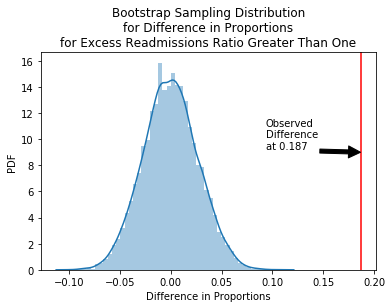

In [232]:
# bootstrap sampling distribution under null hypothesis
_ = sns.distplot(bs_replicates, norm_hist = True)
_ = plt.axvline(x=empirical_diff_proportions, color = 'red')
_ = plt.title('Bootstrap Sampling Distribution\nfor Difference in Proportions\nfor Excess Readmissions Ratio Greater Than One')
_ = plt.xlabel('Difference in Proportions')
_ = plt.ylabel('PDF')
_ = plt.annotate('Observed\nDifference\nat {}'.format(round(empirical_diff_proportions, 3)), 
                 xy = (empirical_diff_proportions, 9), 
                 xytext = (empirical_diff_proportions * 0.5, 9.25), 
                 arrowprops = dict(facecolor = 'black'))
plt.show()

The graphical results also indicate that the p-value is very small.

****
****

## Two Sample t Test for Population Proportions

* **Null Hypothesis**: The population proportion of excess readmission ratio greater than 1 in hospitals with discharges less than 100 is the same as the population proportion of excess readmission ratio greater than 1 in hospitals with discharges greater than 1000. That is

$$p_{excessReadmit_{100}} = p_{excessReadmit_{1000}}$$

* **Alternative Hypothesis**: The population proportion of excess readmission ratio greater than 1 in hospitals with discharges less than 100 is greater than the population proportion of excess readmission ratio greater than 1 in hospitals with discharges greater than 1000. That is

$$p_{excessReadmit_{100}} > p_{excessReadmit_{1000}}$$

Check Assumptions:

To perform a two-sample t-test, I will first check the following assumptions.

1. Are the distributions independent from each other?
    * Yes. I will assume that the distributions are independent from each other.
2. Are the samples taken independently?
    * Yes. Same reason as assumption 1.
3. Can we assume normal distributions for the sampling distribution of the sample proportion for the two samples?  

    * $n_{excessReadmit_{100}} * \hat{p}_{excessReadmit_{100}} \:\:\:\:\:\:\:\:\:\:\:= 751 > 10$  
    * $n_{excessReadmit_{100}} * \left(1 - \hat{p}_{excessReadmit_{100}}\right) \:= 437 > 10$
    * $n_{excessReadmit_{1000}} * \hat{p}_{excessReadmit_{1000}} \:\:\:\:\:\:\:\:\:= 205> 10$ 
    * $n_{excessReadmit_{1000}} * \left(1 - \hat{p}_{excessReadmit_{1000}}\right) = 255 > 10$  
    
    
* Since all four criteria are met, we can assume normal distributions for the sampling distributions of the sample proportions for the two samples.
4. Do the populations have equal variance?
    * To test this, I will perform an F test for testing equal variance.

Procedure:

1. Assume $p_{excessReadmit_{100_{H_0}}} = p_{excessReadmit_{1000_{H_0}}}$. So, under the null hypothesis, difference in proportions is zero.
2. Test to see if it's valid to assume whether $\sigma^2_{excessReadmit_{100}} = \sigma^2_{excessReadmit_{1000}}$.
    * If the two population standard deviations seem to be equal, then perform the pooled t test. That is, use the following estimate for the standard error:  
    
$$standard\:error = s_p\sqrt{1/n_{excessReadmit_{100}} + 1/n_{excessReadmit_{1000}}}$$  

where $$s_p^2 = \frac{(n_{excessReadmit_{100}} - 1)s_{excessReadmit_{100}}^2 + (n_{excessReadmit_{1000}} - 1)s_{excessReadmit_{1000}}^2}{n_{excessReadmit_{100}} + n_{excessReadmit_{1000}} - 2}$$

where  
+ $n_{excessReadmit_{100}}$ is the sample size of excessReadmit_100
+ $n_{excessReadmit_{1000}}$ is the sample size of excessReadmit_1000
+ $s_{excessReadmit_{100}}^2$ is the sample variance of excessReadmit_100
+ $s_{excessReadmit_{1000}}^2$ is the sample variance of excessReadmit_1000

and $df = n_{excessReadmit_{100}} + n_{excessReadmit_{1000}} - 2$


- If the two population standard deviations seems to be different, then use the unpooled t test using the following estimate for standard error:
    
$$standard\:error = \sqrt{\frac{s_{excessReadmit_{100}}^2}{n_{excessReadmit_{100}}} + \frac{s_{excessReadmit_{1000}}^2}{n_{excessReadmit_{1000}}}}$$

and $df$ is complicated (usually calculated by software).  

3. Calculate the test statistic:
$$ t = \frac{\hat{p}_{excessReadmit_{100}} - \hat{p}_{excessReadmit_{1000}} - 0}{s.e.}$$  

5. Calculate the p-value as getting the difference in proportions or greater values than the one I observed in the sample. This is a one-sided test.
5. Compare p-value to signifance level $\alpha$. In this case, I'll use $\alpha = 0.05$.

**Test of Equal Variance: F Test**

In [233]:
# equal variance f-test
F = np.var(excessReadmit_1000) / np.var(excessReadmit_100) # f-statistic

# calculate the number of samples in each group
n_100 = len(excessReadmit_100_excess)
n_1000 = len(excessReadmit_1000_excess)

df1 = n_1000 - 1 - 1 # degrees of freedom 1
df2 = n_100 - 1 # degrees of freedom 2
p_value = f.cdf(F, df1, df2) # p-value
p_value

0.9999999999999999

Since the p-value is quite high, I can safely assume that the population variances are equal. So, I will use the pooled variance.

**Two-Sample t-Test**

In [234]:
# two-sample t-test
results = ttest_ind(excessReadmit_100, excessReadmit_1000, equal_var = True)
results

Ttest_indResult(statistic=9.914442964326538, pvalue=1.5212365437597773e-22)

The p-value above is for two-sided test. But since this is a one-sided test, we need to divide the p-value by 2. So, the p-value is 7.606e-23. Based on the p-value, at the 0.01 significance level, I will reject the null hypothesis that the two populations have equal excess readmission ratio proportions.

Let's examine the two-sample t-test results graphically.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


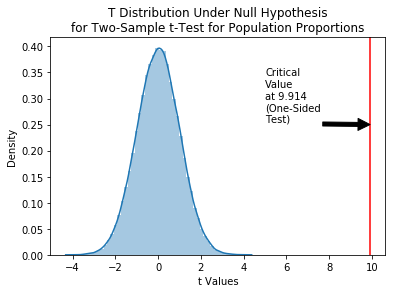

In [235]:
# sample 100000 times from a standard t distribution with df = 128
t_distribution = np.random.standard_t(df = df1 + df2, size = 100000)

test_statistic = results[0]

# generate plot
_ = sns.distplot(t_distribution, norm_hist = True)
_ = plt.axvline(x=test_statistic, color = 'red')
_ = plt.title('T Distribution Under Null Hypothesis\nfor Two-Sample t-Test for Population Proportions')
_ = plt.xlabel('t Values')
_ = plt.ylabel('Density')
_ = plt.annotate('Critical\nValue\nat {}\n(One-Sided\nTest)'.format(round(test_statistic, 3)), 
                 xy = (test_statistic, 0.25), 
                 xytext = (5, .255), 
                 arrowprops = dict(facecolor = 'black'))
plt.show()

## Conclusion

Based on both the bootstrap test result and the two-sample t-test result, I can see that the proportion of excess readmission ratio greater than one between hospitals with discharges less than 100 and hospitals with discharges greater than 1000 are different. In fact, the proportion of hospitals with discharges less than 100 have excess readmission ratio greater than one that is greater than that of the hospitals with discharges greater than 1000.

It is important to note that this difference is statistically different. Since the observed difference in proportions are 0.19, or 19%, we can conclude that practically, there seems to be a difference as well. What this exactly means should be further investigated.

## 5. Look at the scatterplot above. 
- What are the advantages and disadvantages of using this plot to convey information?
- Construct another plot that conveys the same information in a more direct manner.

The advantage of using this plot to convey information is that it gives a quick understanding of the relationship between excess readmission ratio and number of discharges. It is easy to see that there are a handful of outliers and that the correlations is very weak.

The disadvantage of using this plot to convey information is that it is hard to validate the following that is stated above:

+ With lower number of discharges, there is a greater incidence of excess rate of readmissions
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions

To validate these statements more directly, it's best to compare the distributions of excess rate of readmissions between hospitals with less than 100 discharges and hospitals with more than 1000 discharges. I will do this by creating box plots for the two distributions.

/root/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


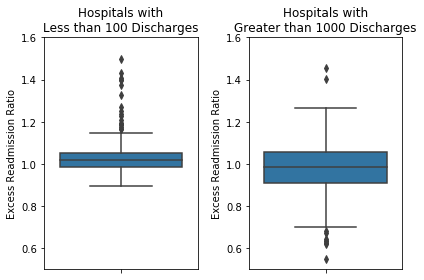

In [236]:
fig, (ax1, ax2) = plt.subplots(1, 2)
_ = sns.boxplot(excessReadmit_100, ax = ax1, orient = 'v')
_ = ax1.set_title('Hospitals with\nLess than 100 Discharges')
_ = ax1.set_ylim([0.5, 1.6])
_ = sns.boxplot(excessReadmit_1000, ax = ax2, orient = 'v')
_ = ax2.set_title('Hospitals with\nGreater than 1000 Discharges')
_ = ax2.set_ylim([0.5, 1.6])
fig.tight_layout()
fig.show()

Here, we see that hospitals with less than 100 discharges have a slightly higher median of excess readmission ratio than the hospitals with greater than 1000 discharges. However, the spread for hospitals with less than 100 discharges is smaller than the spread for hospitals with greater than 1000 discharges. Further, there's more outliers for hospitals with less than 100 discharges. Hence, the difference between these two groups may not be of much practical importance.